In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [2]:
rentals = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv")

In [3]:
rentals.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [4]:
rentals.no_fee.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_roofdeck.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_washer_dryer.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_doorman.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_elevator.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_dishwasher.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_patio.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_gym.replace({1:'yes', 0:'no'}, inplace=True)
rentals.drop(columns=['rental_id', 'building_id'], inplace=True)

In [6]:
# association between quantitive and categorical variables
rentals.groupby('borough').mean().rent

borough
Brooklyn     3327.403751
Manhattan    5138.940379
Queens       2516.147321
Name: rent, dtype: float64

In [7]:
rentals.groupby('borough').median().rent

borough
Brooklyn     3000.0
Manhattan    4000.0
Queens       2350.0
Name: rent, dtype: float64

<AxesSubplot:xlabel='borough', ylabel='rent'>

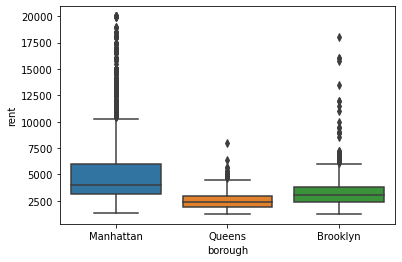

In [9]:
sns.boxplot(x='borough', y='rent', data=rentals)

<AxesSubplot:xlabel='borough', ylabel='rent'>

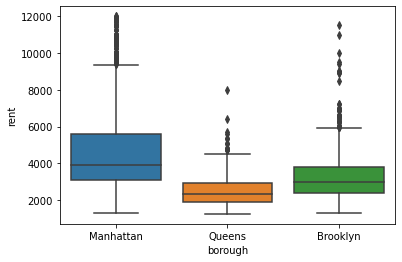

In [10]:
sns.boxplot(x='borough', y='rent', data=rentals[rentals.rent < 12000])

<AxesSubplot:xlabel='has_washer_dryer', ylabel='rent'>

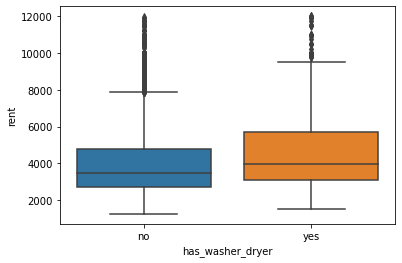

In [11]:
sns.boxplot(x='has_washer_dryer', y='rent', data=rentals[rentals.rent < 12000])

<AxesSubplot:xlabel='has_elevator', ylabel='rent'>

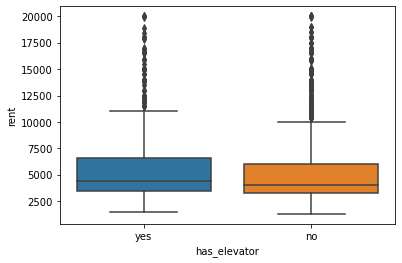

In [15]:
sns.boxplot(x='has_elevator', y='rent', data=rentals[rentals.floor>5])

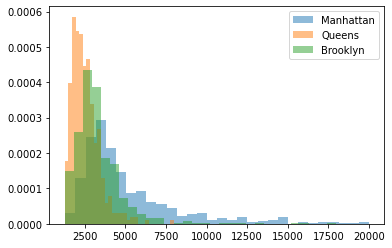

In [18]:
# plot rent grouped by boroughs. density squishes it together since manhatten has more appartments than queens for example
plt.hist(rentals.rent[rentals.borough=='Manhattan'], label='Manhattan', bins=30, density=True, alpha=.5)
plt.hist(rentals.rent[rentals.borough=='Queens'], label='Queens', bins=30, density=True, alpha=.5)
plt.hist(rentals.rent[rentals.borough=='Brooklyn'], label='Brooklyn', bins=30, density=True, alpha=.5)
plt.legend()
plt.show()

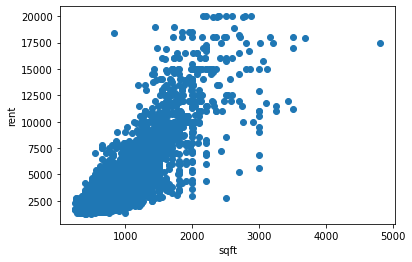

In [22]:
# associations between two quantitive variables
plt.scatter(rentals.size_sqft, rentals.rent)
plt.xlabel('sqft')
plt.ylabel('rent')
plt.show()

In [26]:
# checkk correlation: 1 being linear
from scipy.stats import pearsonr
pearsonr(rentals.size_sqft, rentals.rent)

(0.8087835060658327, 0.0)

In [25]:
rentals.corr()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
rent,1.000000,0.531200,0.733644,0.808784,0.003652,0.272351,-0.122302
bedrooms,0.531200,1.000000,0.647499,0.738410,0.053365,-0.006468,0.070329
bathrooms,0.733644,0.647499,1.000000,0.770593,0.054891,0.145303,-0.103050
size_sqft,0.808784,0.738410,0.770593,1.000000,0.024422,0.100234,0.026434
min_to_subway,0.003652,0.053365,0.054891,0.024422,1.000000,0.029242,-0.138273
floor,0.272351,-0.006468,0.145303,0.100234,0.029242,1.000000,-0.352757
building_age_yrs,-0.122302,0.070329,-0.103050,0.026434,-0.138273,-0.352757,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'rent'),
  Text(0, 1.5, 'bedrooms'),
  Text(0, 2.5, 'bathrooms'),
  Text(0, 3.5, 'size_sqft'),
  Text(0, 4.5, 'min_to_subway'),
  Text(0, 5.5, 'floor'),
  Text(0, 6.5, 'building_age_yrs')])

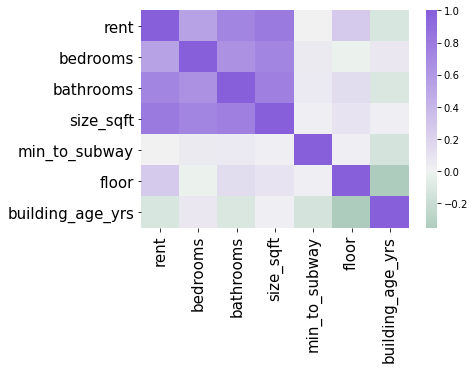

In [27]:
# create a heatmap for correlation
# 
colors = sns.diverging_palette(150,275, as_cmap=True)

sns.heatmap(rentals.corr(), center=0, cmap=colors)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

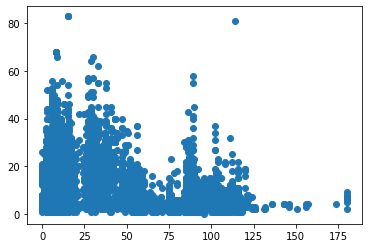

In [28]:
plt.scatter(rentals.building_age_yrs, rentals.floor)

In [30]:
# associate two categorical variables
pd.crosstab(rentals.has_elevator, rentals.has_gym)

has_gym,no,yes
has_elevator,,
no,3748,52
yes,533,667


<AxesSubplot:xlabel='has_elevator', ylabel='count'>

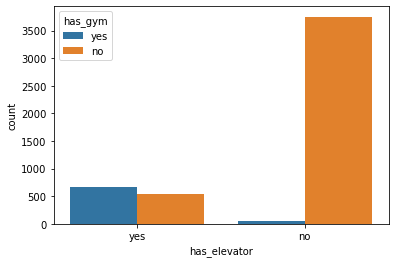

In [33]:
sns.countplot(x='has_elevator', hue='has_gym', data=rentals)